In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import GamblerProblemModel

In [2]:
p = GamblerProblemModel(goal=10, success_probability=0.4)
p.n_states, p.n_nonterminal_states, p.n_actions

(11, 9, 5)

In [3]:
tps = p.define_transition_probability_matrices()

In [4]:
v_track, pi_track, err = p.run_value_iteration(convergence=10e-8, keep_track=True)
v_track.shape

(23, 9)

In [5]:
print(pi_track[-1])
print(v_track[-1])



[0 1 1 0 4 0 2 1 0]
[0.04346347 0.10865872 0.18607808 0.27164685 0.4        0.4651952
 0.56298807 0.67911712 0.80747027]


In [6]:
print(pi_track)

[[0 0 0 0 4 3 2 1 0]
 [0 0 1 0 4 0 0 1 0]
 [0 0 1 0 4 0 2 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 3 4 0 1 1 0]
 [0 1 1 3 4 0 1 1 0]
 [0 1 1 3 4 0 1 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 3 1 1 0]
 [0 1 1 0 4 3 1 1 0]
 [0 1 1 0 4 3 2 1 0]
 [0 1 1 0 4 0 1 1 0]
 [0 1 1 0 4 3 1 1 0]
 [0 1 1 0 4 3 1 1 0]
 [0 1 1 0 4 3 2 1 0]
 [0 1 1 0 4 0 2 1 0]
 [0 1 1 0 4 0 2 1 0]
 [0 1 1 0 4 0 2 1 0]
 [0 1 1 0 4 0 2 1 0]]


In [7]:
pi_track.shape

(23, 9)

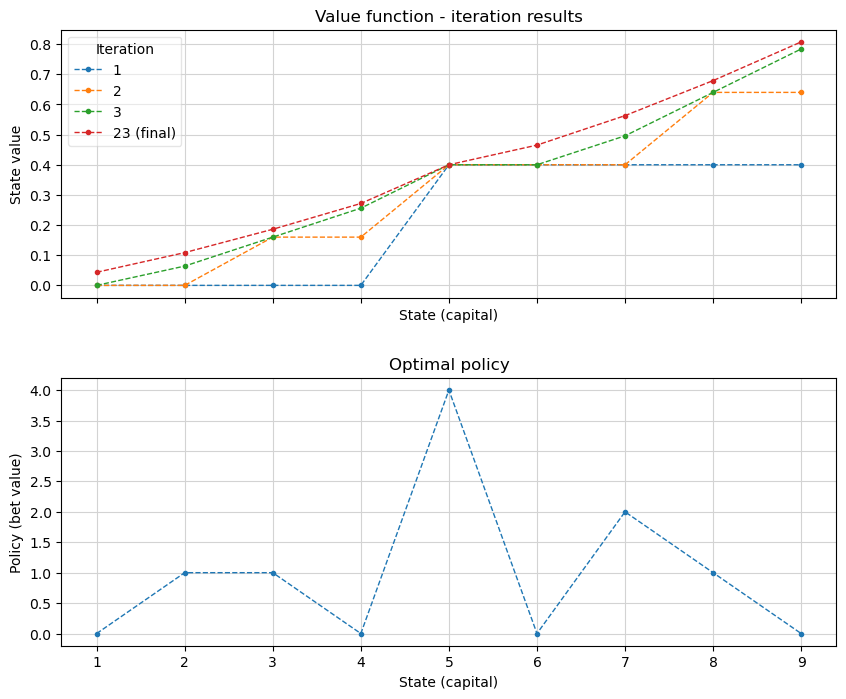

In [8]:
x = np.arange(p.n_nonterminal_states) + 1
kw = dict(ls='--', marker='.', lw=1)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
for ax in axes:
    ax.grid(color='lightgrey')
    ax.set_xlabel("State (capital)")

for idx in (0, 1, 2, -1):
    axes[0].plot(
        x,
        v_track[idx],
        label=(f"{len(pi_track)} (final)" if idx==-1 else f"{idx+1}"),
        **kw
    )

axes[0].legend(title="Iteration", fancybox=True, framealpha=0.5)
axes[0].set_title("Value function - iteration results")
axes[0].set_ylabel("State value")

axes[1].plot(x, pi_track[-1], **kw)
axes[1].set_title("Optimal policy")
axes[1].set_ylabel("Policy (bet value)")

fig.subplots_adjust(hspace=0.3)

